In [4]:
!pip install numpy matplotlib

!pip install ipython


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


# Phase Damping (Dephasing) Channel (Simulation)

Phase damping destroys **quantum coherence** (off-diagonal terms) without changing populations:

\[
\rho =
\begin{pmatrix}
\rho_{00} & \rho_{01}\\
\rho_{10} & \rho_{11}
\end{pmatrix}
\quad\Rightarrow\quad
\mathcal{E}(\rho)=
\begin{pmatrix}
\rho_{00} & (1-\lambda)\rho_{01}\\
(1-\lambda)\rho_{10} & \rho_{11}
\end{pmatrix}
\]

A Kraus form is:

\[
E_0 = \sqrt{1-\lambda}\,I,\quad
E_1 = \sqrt{\lambda}\,|0\rangle\langle0|,\quad
E_2 = \sqrt{\lambda}\,|1\rangle\langle1|.
\]

We simulate dephasing and plot fidelity vs \(\lambda\).


Example lambda = 0.5
Output density matrix rho_out =
 [[0.5 +0.j 0.25+0.j]
 [0.25+0.j 0.5 +0.j]]


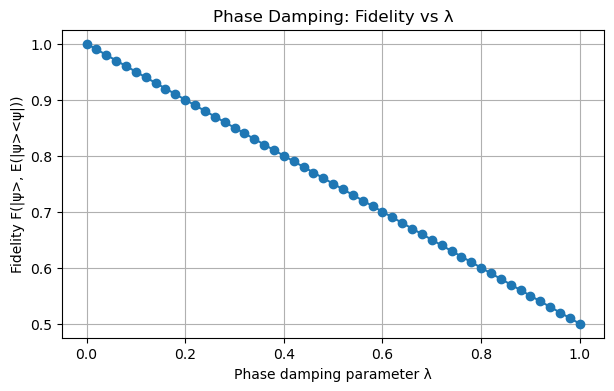

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helpers
def normalize(v):
    return v / np.linalg.norm(v)

def rho_from_state(psi):
    return np.outer(psi, np.conjugate(psi))

def fidelity_pure_vs_rho(psi, rho):
    return float(np.real(np.vdot(psi, rho @ psi)))

# --- Phase damping Kraus operators
def phase_damping_kraus(lam):
    I = np.eye(2, dtype=complex)
    P0 = np.array([[1,0],[0,0]], dtype=complex)
    P1 = np.array([[0,0],[0,1]], dtype=complex)

    E0 = np.sqrt(1-lam) * I
    E1 = np.sqrt(lam) * P0
    E2 = np.sqrt(lam) * P1
    return [E0, E1, E2]

def apply_kraus(rho, kraus_ops):
    out = np.zeros_like(rho, dtype=complex)
    for E in kraus_ops:
        out += E @ rho @ E.conj().T
    return out

# --- Example state (choose superposition so dephasing is visible)
psi = normalize(np.array([1, 1], dtype=complex))  # |+> state
rho = rho_from_state(psi)

lams = np.linspace(0, 1, 51)
F = []

for lam in lams:
    rho_out = apply_kraus(rho, phase_damping_kraus(lam))
    F.append(fidelity_pure_vs_rho(psi, rho_out))

# Print example
lam_test = 0.5
rho_test = apply_kraus(rho, phase_damping_kraus(lam_test))
print("Example lambda =", lam_test)
print("Output density matrix rho_out =\n", rho_test)

# Plot
plt.figure(figsize=(7,4))
plt.plot(lams, F, marker="o")
plt.xlabel("Phase damping parameter λ")
plt.ylabel("Fidelity F(|ψ>, E(|ψ><ψ|))")
plt.title("Phase Damping: Fidelity vs λ")
plt.grid(True)
plt.show()
